## Analysis of timestep influence on propagation and spacecraft lifetime

In [1]:
import sys
from typing import Tuple, Callable

from astropy import units as u
from astropy.time import Time, TimeDelta
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
from poliastro.bodies import Earth

sys.path.insert(0, "../")
from digital_twin.plotting import plot_1d, find_x_scale, plot_1d_multiple

The EOP file 'finals2000A.all' in /Users/mathildesimoni/src/iers/ is already the latest.
The Leap Second file 'Leap_Second.dat' in /Users/mathildesimoni/src/iers/ is already the latest.


In [28]:
# Poliastro propagator data
results_folder = "propagation_data/"
times_600 = np.load(results_folder + "times_timestep_600s.npy")
altitudes_600 = np.load(results_folder + "altitude_timestep_600s.npy")
RAANs_600 = np.load(results_folder + "RAAN_timestep_600s.npy")
ECCs_600 = np.load(results_folder + "ECC_timestep_600s.npy")
AOPs_600 = np.load(results_folder + "AOP_timestep_600s.npy")
INCs_600 = np.load(results_folder + "INC_timestep_600s.npy")

times_1200 = np.load(results_folder + "times_timestep_1200s.npy")
altitudes_1200 = np.load(results_folder + "altitude_timestep_1200s.npy")
RAANs_1200 = np.load(results_folder + "RAAN_timestep_1200s.npy")
ECCs_1200 = np.load(results_folder + "ECC_timestep_1200s.npy")
AOPs_1200 = np.load(results_folder + "AOP_timestep_1200s.npy")
INCs_1200 = np.load(results_folder + "INC_timestep_1200s.npy")

times_300 = np.load(results_folder + "times_timestep_300s.npy")
altitudes_300 = np.load(results_folder + "altitude_timestep_300s.npy")
RAANs_300 = np.load(results_folder + "RAAN_timestep_300s.npy")
ECCs_300 = np.load(results_folder + "ECC_timestep_300s.npy")
AOPs_300 = np.load(results_folder + "AOP_timestep_300s.npy")
INCs_300 = np.load(results_folder + "INC_timestep_300s.npy")

times_3600 = np.load(results_folder + "times_timestep_3600s.npy")
altitudes_3600 = np.load(results_folder + "altitude_timestep_3600s.npy")
RAANs_3600 = np.load(results_folder + "RAAN_timestep_3600s.npy")
ECCs_3600 = np.load(results_folder + "ECC_timestep_3600s.npy")
AOPs_3600 = np.load(results_folder + "AOP_timestep_3600s.npy")
INCs_3600 = np.load(results_folder + "INC_timestep_3600s.npy")

31536000.0


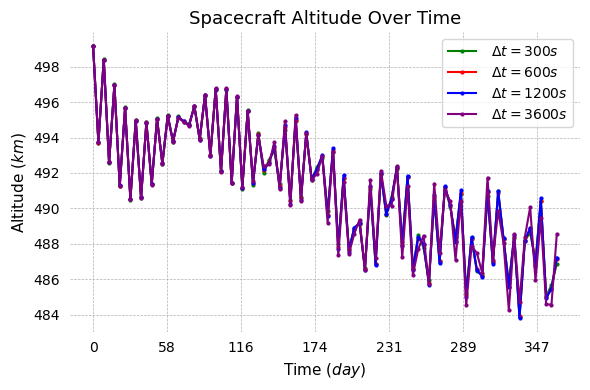

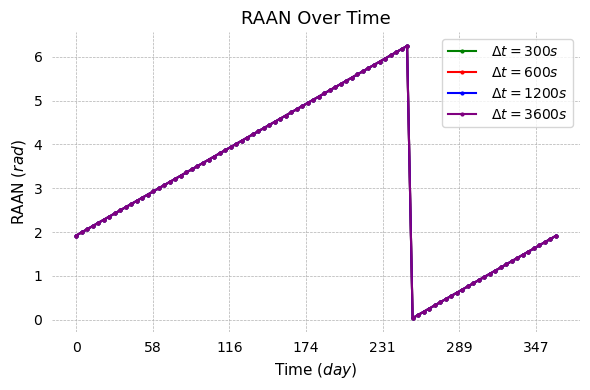

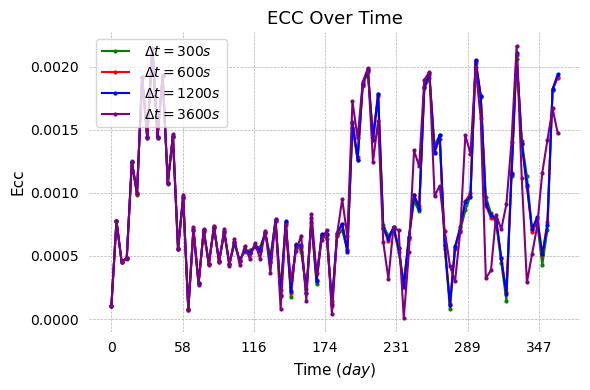

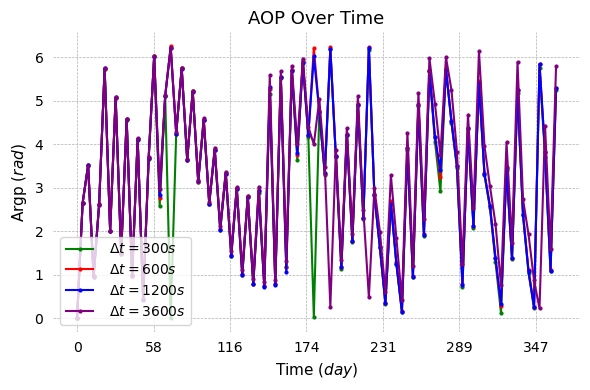

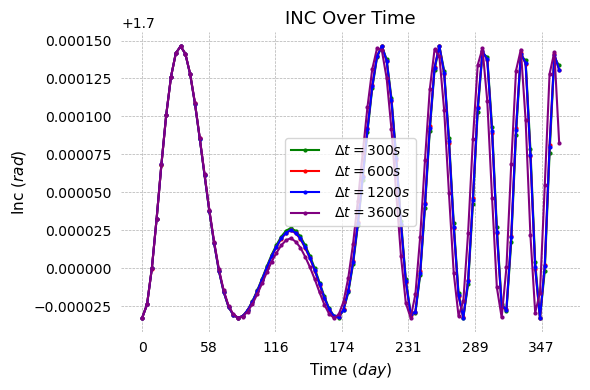

In [ ]:
duration_sim = TimeDelta(times_600[-1])
print(duration_sim)
x_label, x_label_f = find_x_scale(duration_sim)

steps = [1200, 600, 300, 100]
# steps = [1, 1, 1, 1]
labels = [
    r" $\Delta t = 300s$",
    r" $\Delta t = 600s$",
    r" $\Delta t = 1200s$",
    r" $\Delta t = 3600s$",
]
colors = ["green", "red", "blue", "purple"]
xs = [times_300, times_600, times_1200, times_3600]
ys_altitudes = [altitudes_300, altitudes_600, altitudes_1200, altitudes_3600]
ys_RAANs = [RAANs_300, RAANs_600, RAANs_1200, RAANs_3600]
ys_ECCs = [ECCs_300, ECCs_600, ECCs_1200, ECCs_3600]
ys_AOPs = [AOPs_300, AOPs_600, AOPs_1200, AOPs_3600]
ys_INCs = [INCs_300, INCs_600, INCs_1200, INCs_3600]

plot_1d_multiple(
    xs,
    ys_altitudes,
    "Spacecraft Altitude Over Time",
    x_label,
    r"Altitude ($km$)",
    colors=colors,
    labels=labels,
    step=steps,
    fill_under=False,
    remove_box=True,
    show=True,
    x_label_f=x_label_f,
    save_filename=results_folder + "_altitude_comparison.jpg",
)

plot_1d_multiple(
    xs,
    ys_RAANs,
    "RAAN Over Time",
    x_label,
    r"RAAN ($rad$)",
    colors=colors,
    labels=labels,
    step=steps,
    fill_under=False,
    remove_box=True,
    show=True,
    x_label_f=x_label_f,
    save_filename=results_folder + "_RAAN_comparison.jpg",
)

plot_1d_multiple(
    xs,
    ys_ECCs,
    "ECC Over Time",
    x_label,
    r"Ecc",
    colors=colors,
    labels=labels,
    step=steps,
    fill_under=False,
    remove_box=True,
    show=True,
    x_label_f=x_label_f,
    save_filename=results_folder + "_ECC_comparison.jpg",
)

plot_1d_multiple(
    xs,
    ys_AOPs,
    "AOP Over Time",
    x_label,
    r"Argp ($rad$)",
    colors=colors,
    labels=labels,
    step=steps,
    fill_under=False,
    remove_box=True,
    show=True,
    x_label_f=x_label_f,
    save_filename=results_folder + "AOP_comparison.jpg",
)

plot_1d_multiple(
    xs,
    ys_INCs,
    "INC Over Time",
    x_label,
    r"Inc ($rad$)",
    colors=colors,
    labels=labels,
    step=steps,
    fill_under=False,
    remove_box=True,
    show=True,
    x_label_f=x_label_f,
    save_filename=results_folder + "_INC_comparison.jpg",
)

## Conclusion

Timestep does not seem to infuence much progapation. It is probably because there is some optimization done by Poliastro library, which uses intermediate timesteps.